## <span style="color:#2F749F;"><strong>📦 Sesión práctica 3: Análisis Multivariado</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_3_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:#1a73e8;"><strong>Datos del estudiante</strong></span>

In [1]:
# Solicitar datos al estudiante
nombre = input("Ingresa tu nombre completo: ")
correo = input("Ingresa tu correo electrónico: ")

# Mostrar los datos ingresados
print("\nResumen de datos ingresados:")
print(f"Nombre: {nombre}")
print(f"Correo electrónico: {correo}")


Resumen de datos ingresados:
Nombre: Nataly Rodriguez Atehortua
Correo electrónico: nataly.rodriguez1@udea.edu.co


In [40]:
#Librerias
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.graphics.gofplots import qqplot  
from scipy.stats import kstest, norm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## <span style="color:#1a73e8;"><strong>Parte 3: Análisis Multivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio1: Análisis de componentes principales</strong></span>

A partir de un conjunto de datos real sobre pingüinos antárticos, realizar un análisis multivariado utilizando PCA para reducir la dimensionalidad y visualizar agrupamientos por especie.

1. Carga el conjunto de datos penguins desde la librería seaborn `load_dataset("penguins")`.
2. Selecciona las siguientes variables morfológicas para el análisis:
   - 'bill_length_mm'
   - 'bill_depth_mm'
   - 'flipper_length_mm'
   - 'body_mass_g'
3. Estandariza las variables seleccionadas usando StandardScaler.
4. Aplica PCA()
5. Imprime las ecuaciones que obtuviste para el número de componentes que utilizaste
6. Grafica los resultados en un plano bidimensional (PC1 vs PC2), diferenciando por especie.
7. Interpreta visualmente qué especies se agrupan o separan mejor en el espacio reducido.



In [12]:
# Cargar el dataset "penguins"
data_penguins = sns.load_dataset("penguins")

# Imprimir un resumen del dataset, incluyendo nombres de columnas, tipos de datos y valores faltantes
print(data_penguins.info())

# Mostrar las primeras cinco filas del dataset
display(data_penguins.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [13]:
# Definir la lista de características que se quieren conservar del dataset
features_select = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "species"]

# Crear un nuevo DataFrame que solo incluya las características seleccionadas
data_penguins_selected = data_penguins[features_select]

# Imprimir un resumen del nuevo DataFrame
print(data_penguins_selected.info())

# Mostrar las primeras cinco filas del DataFrame filtrado
display(data_penguins_selected.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   species            344 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
3,NaN,NaN,NaN,NaN,Adelie
4,36.7,19.3,193.0,3450.0,Adelie


Clean DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   species            342 non-null    object 
dtypes: float64(4), object(1)
memory usage: 16.0+ KB
None


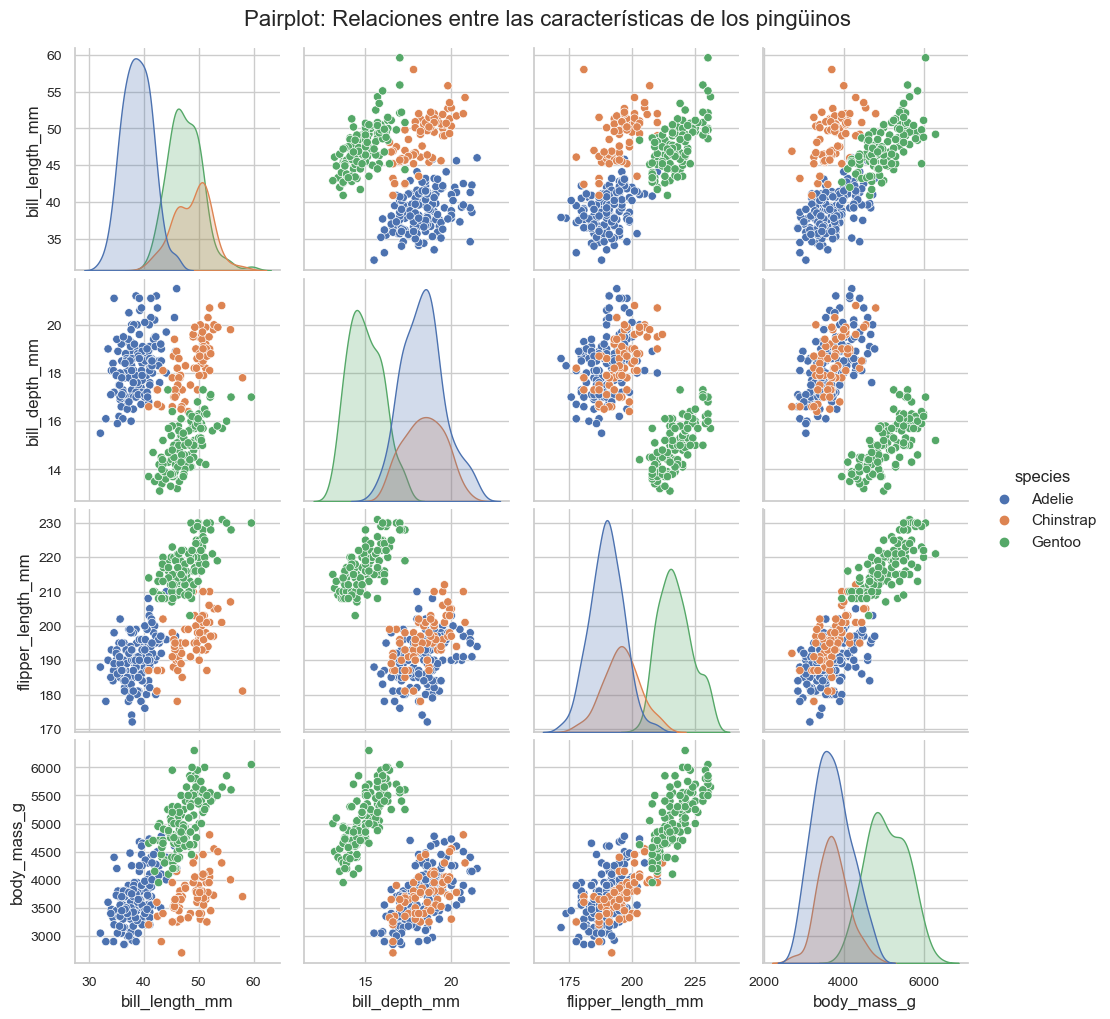

In [17]:
# Remover valores NaN 
data_penguins_selected_clean = data_penguins_selected.dropna()

print("Clean DataFrame info:")
print(data_penguins_selected_clean.info())


sns.set_theme(style="whitegrid")

# PairPlot
g = sns.pairplot(
    data=data_penguins_selected_clean,
    hue='species',
    palette='deep',  
    diag_kind='kde',
    corner=False
)

# Título y ajustes de diseño
g.fig.suptitle(
    'Pairplot: Relaciones entre las características de los pingüinos',
    fontsize=16,
    y=1.02
)

# Ajustar las etiquetas de los ejes
for ax in g.axes.flatten():
    if ax:
        ax.tick_params(labelsize=10)



### ***Análisis***

La gráfica muestra las relaciones entre las principales características morfológicas de los pingüinos (bill length, bill depth, flipper length y body mass), diferenciadas por especie (Adelie, Chinstrap y Gentoo).

En términos generales, la especie Gentoo se distingue con claridad de las demás, especialmente en la longitud de la aleta (flipper_length_mm) y la masa corporal (body_mass_g), donde presenta valores superiores, así como en la profundidad del pico (bill_depth_mm), en la que se sitúa en valores inferiores. Esta separación se observa de manera consistente tanto en las distribuciones univariadas como en los diagramas de dispersión bivariados, lo que indica que, incluso de forma aislada, estas variables tienen un alto poder discriminante para identificar a esta especie.

En contraste, las especies Adelie y Chinstrap presentan un solapamiento considerable en las características, lo que dificulta su separación al analizar cada variable de forma individual. No obstante, al considerar la longitud del pico (bill_length_mm) junto con otras variables, como la profundidad del pico (bill_depth_mm), la longitud de la aleta (flipper_length_mm) o la masa corporal (body_mass_g), se mejora la separabilidad observada en los diagramas de dispersión bivariados.


In [39]:
# Escalar los datos
# Identificar todas las características numéricas en el dataset, excluyendo la variable objetivo 'species'
numeric_features = [col for col in data_penguins_selected_clean.columns if col != 'species']

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar la normalización solo a las características numéricas del dataset
x_scaler = scaler.fit_transform(data_penguins_selected_clean[numeric_features])


,Component,Eigenvalue,Explained Variance,Cumulative Variance
0,PC1,2.761831,0.688439,0.688439
1,PC2,0.774782,0.193129,0.881568
2,PC3,0.366307,0.091309,0.972877
3,PC4,0.108810,0.027123,1.000000


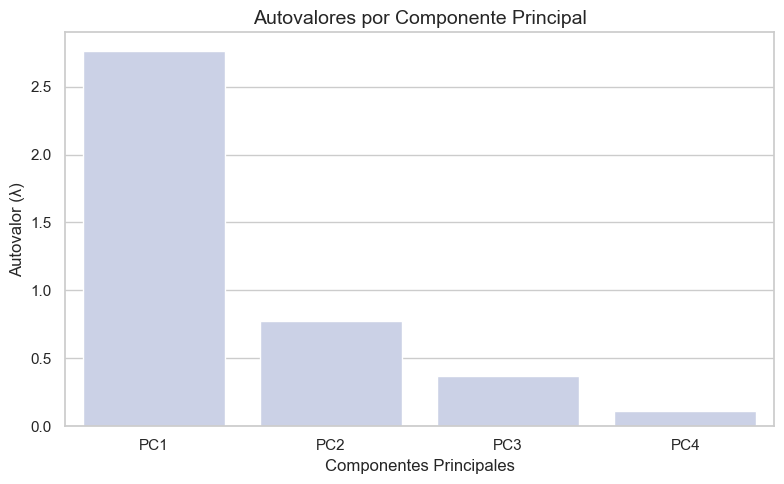

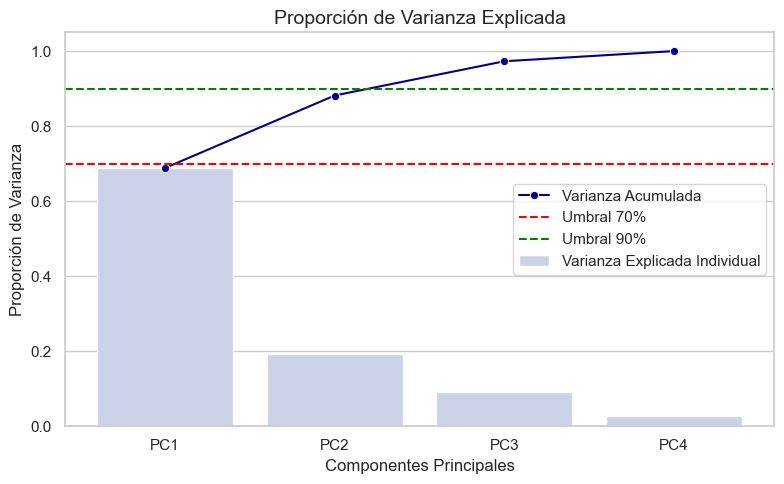

In [16]:
# Realizar PCA
pca = PCA()
X_pca = pca.fit_transform(x_scaler)

# Varianza explicada
variance = pca.explained_variance_
explained_ratio = pca.explained_variance_ratio_
cumulative_explained = np.cumsum(explained_ratio)
components = [f'PC{i+1}' for i in range(len(explained_ratio))]

# Crear DataFrame para visualización
df_variance = pd.DataFrame({
    'Component': components,
    'Eigenvalue': variance,
    'Explained Variance': explained_ratio,
    'Cumulative Variance': cumulative_explained,
})
display(df_variance)

df_variance['Index'] = np.arange(len(df_variance))

sns.set_theme(style="whitegrid")

# === Gráfico 1: Autovalores (Eigenvalues) ===
plt.figure(figsize=(8, 5))
sns.barplot(x='Index', y='Eigenvalue', data=df_variance, color="#c7ceea")
plt.title('Autovalores por Componente Principal', fontsize=14)
plt.ylabel('Autovalor (λ)', fontsize=12)
plt.xlabel('Componentes Principales', fontsize=12)
plt.xticks(df_variance['Index'], df_variance['Component'])
plt.tight_layout()
plt.show()

# === Gráfico 2: Varianza Explicada ===
plt.figure(figsize=(8, 5))
sns.barplot(x='Index', y='Explained Variance', data=df_variance, color="#c7ceea", label='Varianza Explicada Individual')
sns.lineplot(x='Index', y='Cumulative Variance', data=df_variance, marker='o', color='darkblue', label='Varianza Acumulada')

# Líneas de umbral
plt.axhline(0.7, color='red', linestyle='--', label='Umbral 70%')
plt.axhline(0.9, color='green', linestyle='--', label='Umbral 90%')

# Títulos y etiquetas
plt.title('Proporción de Varianza Explicada', fontsize=14)
plt.ylabel('Proporción de Varianza', fontsize=12)
plt.xlabel('Componentes Principales', fontsize=12)
plt.xticks(df_variance['Index'], df_variance['Component'])
plt.legend()
plt.tight_layout()
plt.show()



### ***Análisis***

Al aplicar la técnica de Análisis de Componentes Principales (PCA), se observa que el primer componente principal (PC1) posee un eigenvalor de 2.76 y explica aproximadamente el 68.8% de la varianza total. El segundo componente principal (PC2) contribuye con un eigenvalor de 0.77, lo que representa un 19.3% adicional de la varianza.

En conjunto, PC1 y PC2 explican cerca del 88.2% de la varianza acumulada, lo cual indica que la mayor parte de la información contenida en las variables originales puede ser representada de forma adecuada en un espacio bidimensional.

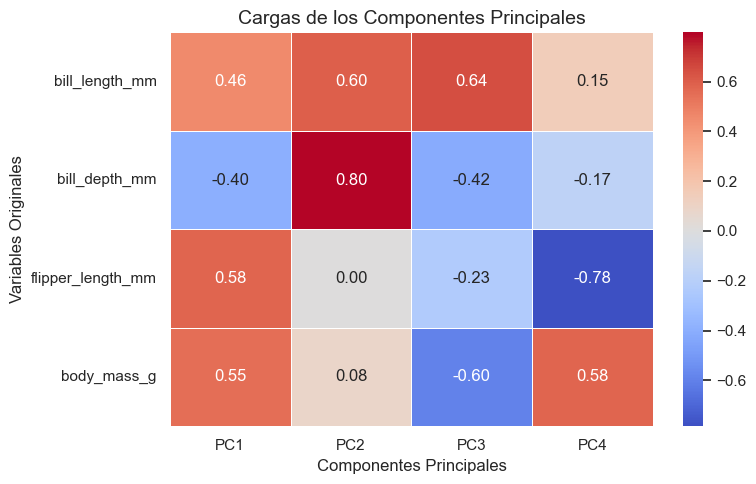

Ecuaciones de los Componentes Principales:

PC1 = 0.455·bill_length_mm + -0.4·bill_depth_mm + 0.576·flipper_length_mm + 0.548·body_mass_g
PC2 = 0.597·bill_length_mm + 0.798·bill_depth_mm + 0.002·flipper_length_mm + 0.084·body_mass_g
PC3 = 0.644·bill_length_mm + -0.418·bill_depth_mm + -0.232·flipper_length_mm + -0.597·body_mass_g
PC4 = 0.146·bill_length_mm + -0.168·bill_depth_mm + -0.784·flipper_length_mm + 0.58·body_mass_g


In [18]:
# === Matriz de Componentes del PCA ===
componentes = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=numeric_features
)

# === Mapa de calor de autovectores ===
plt.figure(figsize=(8, 5))
sns.heatmap(componentes, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('Cargas de los Componentes Principales', fontsize=14)
plt.ylabel('Variables Originales', fontsize=12)
plt.xlabel('Componentes Principales', fontsize=12)
plt.tight_layout()
plt.show()

# === Ecuaciones de los Componentes Principales ===
print("Ecuaciones de los Componentes Principales:\n")
for i, comp in enumerate(componentes.columns):
    weights = pca.components_[i]
    equation = " + ".join([f"{round(weights[j], 3)}·{features_select[j]}" for j in range(len(weights))])
    print(f"{comp} = {equation}")



### ***Análisis***

El análisis de componentes principales identificó cuatro componentes, en correspondencia con el número de variables morfológicas originales. La primera componente (PC1) explica aproximadamente el 69% de la varianza y se caracteriza por una asociación positiva con la longitud del pico (bill length), la longitud de la aleta (flipper length) y la masa corporal (body mass), mientras que la profundidad del pico (bill depth) presenta una contribución negativa. Esta configuración sugiere que PC1 representa un eje morfológico general de tamaño corporal, donde individuos con mayor masa y dimensiones longitudinales tienden a presentar picos menos profundos.

La segunda componente (PC2), que explica alrededor del 19% de la varianza, está dominada por la morfología del pico, en particular por la longitud (bill length) y la profundidad (bill depth), ambas con contribuciones positivas y de magnitud elevada. Este eje resalta diferencias asociadas principalmente a la forma del pico.

Las componentes restantes (PC3 y PC4), aunque forman parte del modelo, tienen un peso mucho menor, ya que en conjunto aportan menos del 12% de la varianza total. PC3 presenta una mayor contribución positiva de la longitud del pico (bill length), mientras que la masa corporal (body mass) y la profundidad del pico (bill depth) aportan negativamente. En PC4, en cambio, predomina el efecto positivo de la masa corporal y la contribución negativa de la longitud de la aleta (flipper length). Debido a su baja capacidad explicativa, estas componentes no se seleccionan

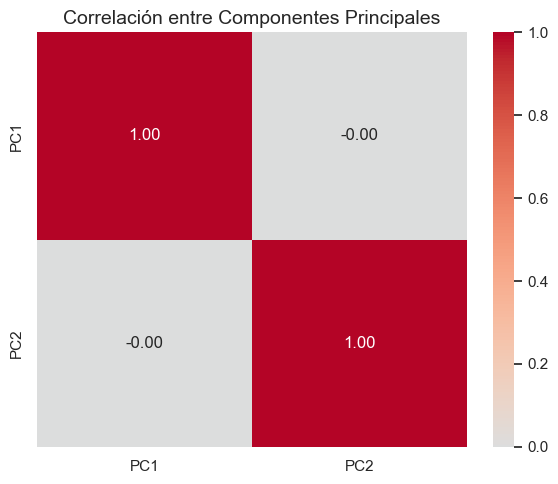

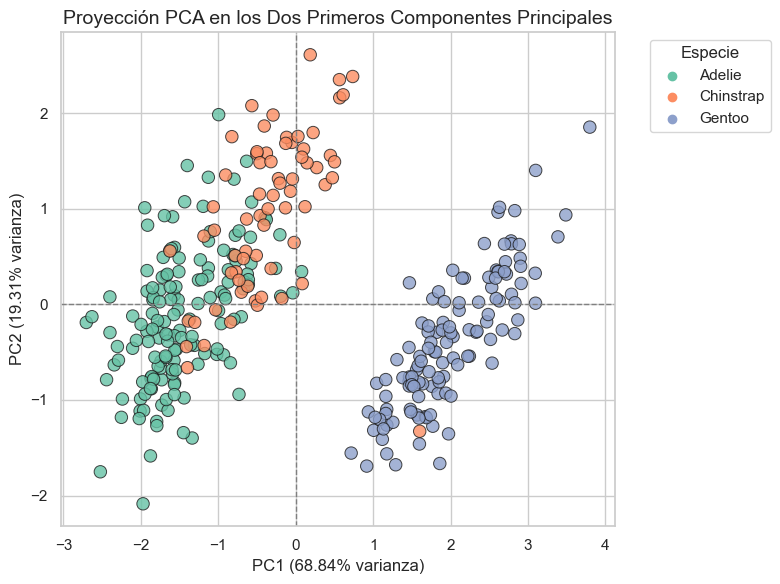

In [19]:
# Matriz de correlación entre los dos primeros componentes principales
df_pca = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
correlations = df_pca.corr()

# Mapa de calor de la correlación entre PC1 y PC2
plt.figure(figsize=(6, 5))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlación entre Componentes Principales', fontsize=14)
plt.tight_layout()
plt.show()

# Agregar la variable de especie al DataFrame del PCA
df_pca['Especie'] = data_penguins_selected_clean['species']

# Gráfico de dispersión con la proyección del PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Especie', palette='Set2', s=80, alpha=0.8, edgecolor='k')

# Títulos y etiquetas mejorados
plt.title('Proyección PCA en los Dos Primeros Componentes Principales', fontsize=14)
plt.xlabel(f'PC1 ({explained_ratio[0]*100:.2f}% varianza)', fontsize=12)
plt.ylabel(f'PC2 ({explained_ratio[1]*100:.2f}% varianza)', fontsize=12)
plt.legend(title='Especie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()



### ***Análisis***

La matriz de correlación en el espacio de los dos primeros componentes principales (PC1 y PC2) confirma la ausencia de relación lineal entre ellos, ya que el coeficiente de Pearson se aproxima a cero, en concordancia con la ortogonalidad del PCA. En este plano, la especie Gentoo (azul) se separa de manera clara a lo largo de PC1, lo que refleja un patrón morfológico diferenciado respecto a las demás especies. Solo un individuo aparece próximo al rango de Chinstrap, constituyendo una excepción dentro de la homogeneidad general de este grupo.

Por otro lado, Adelie (verde) y Chinstrap (naranja) muestran un solapamiento significativo en este espacio reducido, lo que dificulta su separación. Si bien PC2, asociado principalmente con la morfología del pico (bill length y bill depth), introduce cierto grado de dispersión diferencial, esta no resulta suficiente para discriminar de manera estable a ambos grupos.

### <span style="color:#2F749F;"><strong>Ejercicio 2: Regresión Lineal Múltiple</strong></span>  

A partir de un conjunto de datos real sobre diamantes, realiza un análisis de regresión lineal múltiple para predecir el precio en función de variables numéricas relacionadas con sus características físicas.  

1. Carga el conjunto de datos `diamonds` desde la librería seaborn `load_dataset("diamonds")`.  
2. Selecciona las siguientes variables predictoras para el análisis:  
   - `carat`  
   - `depth`  
   - `table`  
   - `x`  
   - `y`  
   - `z`  
3. Define como variable respuesta el precio (`price`).  
4. Divide los datos en entrenamiento y prueba para validar el modelo.  
5. Ajusta un modelo de **Regresión Lineal Múltiple** usando `statsmodels.OLS()`.  
6. Imprime el resumen del modelo (coeficientes, significancia, R² ajustado, etc.).  
7. Evalúa el desempeño del modelo con métricas de ajuste como **RMSE** y **R²** en el conjunto de prueba.  
8. Grafica los valores reales vs. los valores predichos del precio para interpretar la calidad del ajuste.  



In [22]:
# Cargar el conjunto de datos "diamonds"
data_diamonds = sns.load_dataset("diamonds")

# Imprimir un resumen del conjunto de datos, incluyendo nombres de columnas, tipos de datos y valores faltantes
print(data_diamonds.info())

# Mostrar las primeras cinco filas del conjunto de datos
display(data_diamonds.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


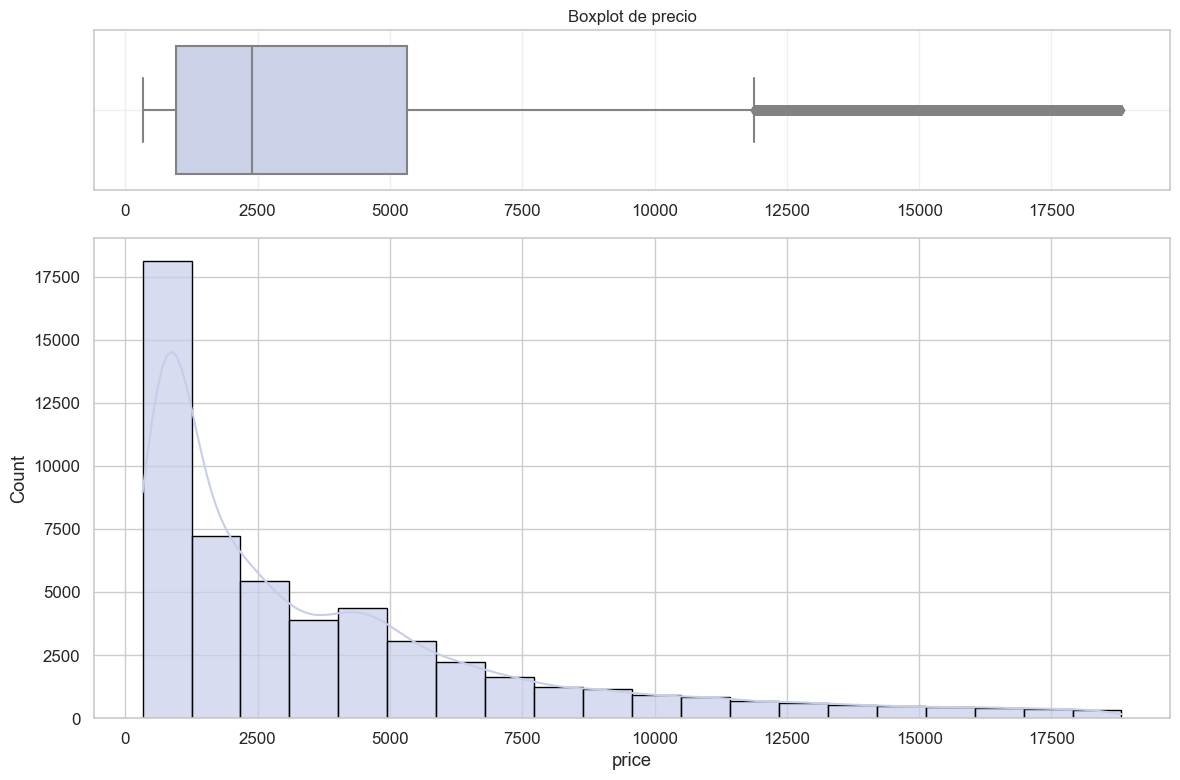


Intervalos y frecuencias:
[326.00, 1250.85) -> 18124
[1250.85, 2175.70) -> 7211
[2175.70, 3100.55) -> 5436
[3100.55, 4025.40) -> 3892
[4025.40, 4950.25) -> 4350
[4950.25, 5875.10) -> 3043
[5875.10, 6799.95) -> 2243
[6799.95, 7724.80) -> 1635
[7724.80, 8649.65) -> 1223
[8649.65, 9574.50) -> 1141
[9574.50, 10499.35) -> 908
[10499.35, 11424.20) -> 837
[11424.20, 12349.05) -> 682
[12349.05, 13273.90) -> 624
[13273.90, 14198.75) -> 523
[14198.75, 15123.60) -> 479
[15123.60, 16048.45) -> 460
[16048.45, 16973.30) -> 403
[16973.30, 17898.15) -> 381
[17898.15, 18823.00) -> 345


In [34]:
# --- Crear figura con dos subplots ---
fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 3]})

# --- Subplot 1: Boxplot ---
sns.boxplot(x=data_diamonds['price'], ax=axes[0], color="#c7ceea")
axes[0].set_title("Boxplot de precio", fontsize=12)
axes[0].set_xlabel("") 
axes[0].grid(alpha=0.3)

# --- Subplot 2: Histograma con KDE ---
sns.histplot(data_diamonds['price'], bins=20, kde=True, color="#c7ceea", edgecolor='black', alpha=0.7, ax=axes[1])


plt.tight_layout()
plt.show()

# --- Mostrar intervalos y frecuencias ---
frecuencias, bordes = np.histogram(data_diamonds['price'], bins=20)
print("\nIntervalos y frecuencias:")
for i in range(len(frecuencias)):
    print(f"[{bordes[i]:.2f}, {bordes[i+1]:.2f}) -> {frecuencias[i]}")

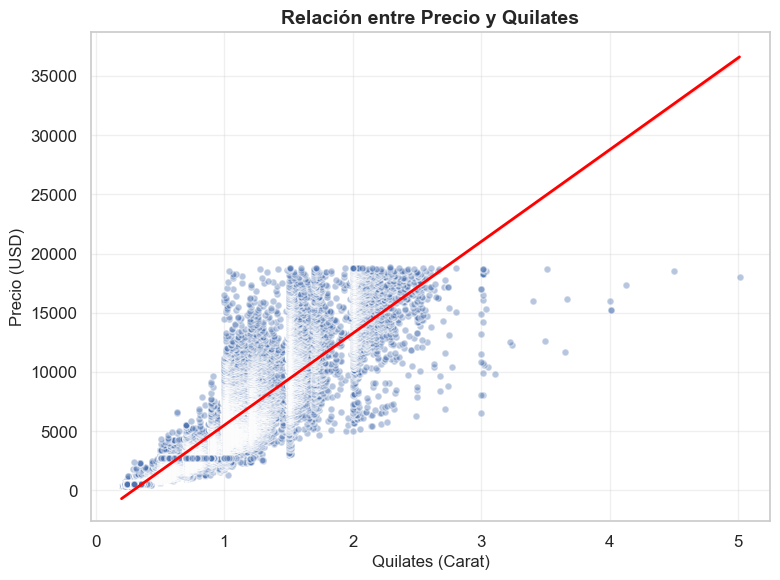

In [33]:
# --- Plot Precio vs Carat ---
sns.set_style("whitegrid")       
sns.set_context("notebook", font_scale=1.1) 

plt.figure(figsize=(8, 6))
sns.regplot(
    x="carat", 
    y="price", 
    data=data_diamonds,
    scatter_kws={'alpha':0.4, 's':25, 'edgecolor':'w'}, 
    line_kws={'color':'red', 'lw':2}                     # línea de regresión 
)

plt.title("Relación entre Precio y Quilates", fontsize=14, weight='bold')
plt.xlabel("Quilates (Carat)", fontsize=12)
plt.ylabel("Precio (USD)", fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### ***Análisis***

El análisis inicial mediante histogramas y boxplot de la variable objetivo price presenta una distribución sesgada hacia valores bajos, con una mediana aproximada de 2,500 USD. La mayoría de los registros se concentra en el rango de 326 a 6,000 USD. Además, se identifica una elevada presencia de valores atípicos (outliers), con precios superiores a 12,000 USD, lo que evidencia presencia de cola larga en esta variable. La densidad de frecuencia disminuye a medida que aumentan los precios, siendo los valores extremadamente altos (superiores a 18,000 USD) significativamente menos frecuentes.

Al analizar price en relación con otra variable de interés, como carat, se observa que ciertos valores de quilates son poco frecuentes, generando “huecos” en la distribución. Esto sugiere que algunos valores de carat se concentran en puntos específicos, mientras que otros apenas aparecen en el dataset.

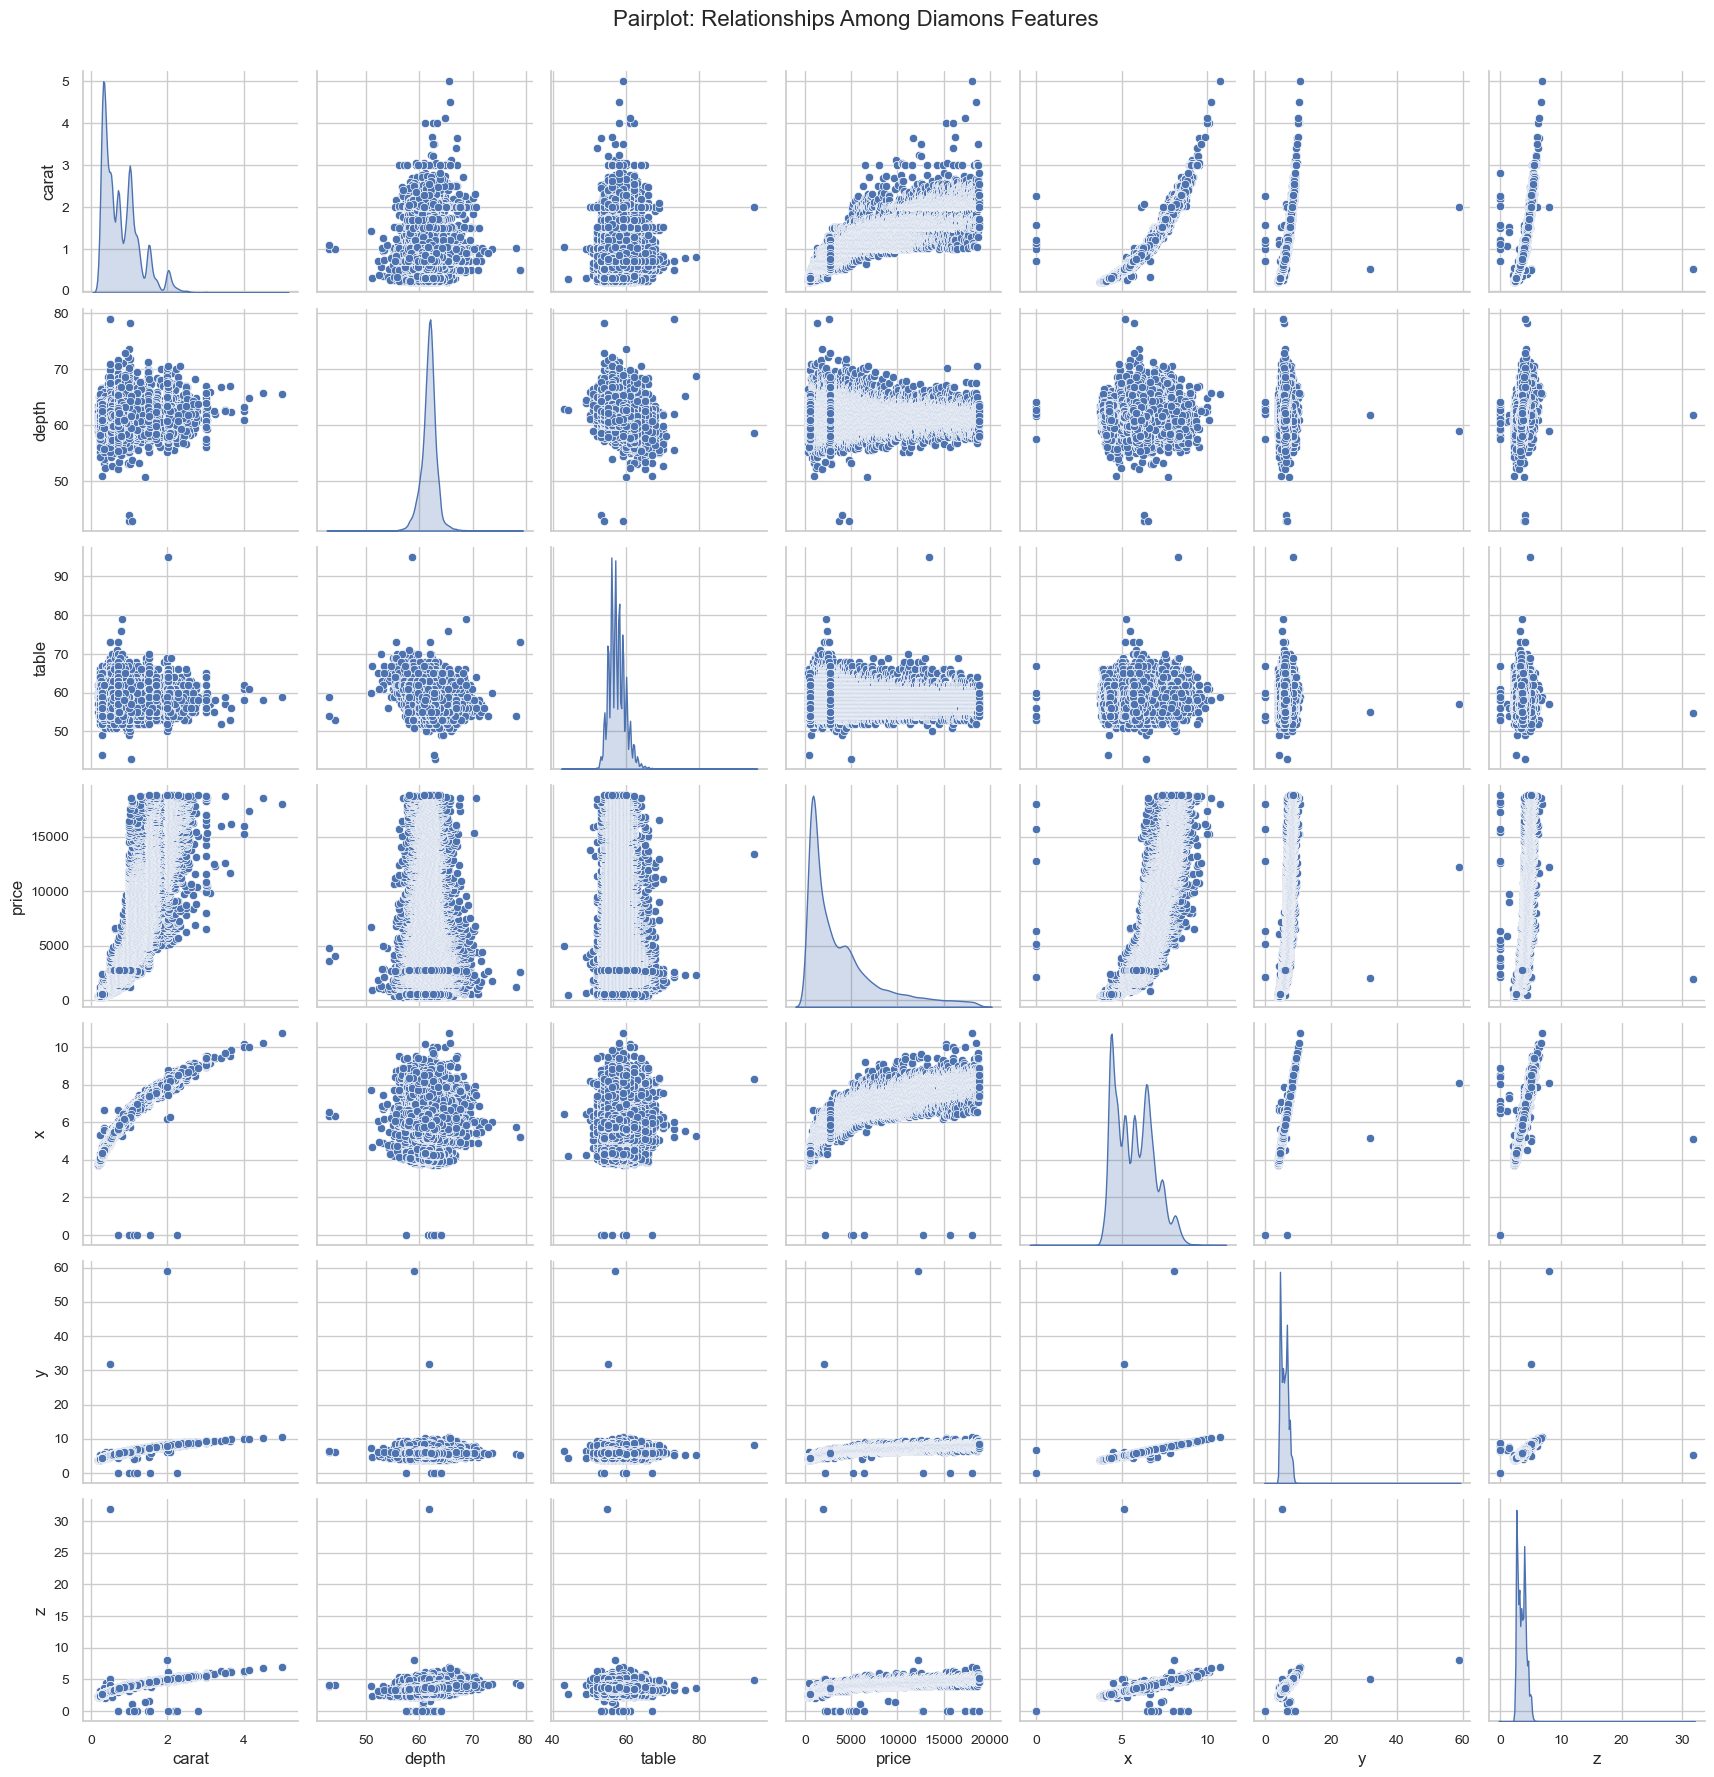

In [24]:
numeric_cols = data_diamonds.select_dtypes(include=['float64', 'int64']).columns
data_diamonds_numeric = data_diamonds[numeric_cols]

# Crear el PairPlot solo con variables numéricas
sns.set_theme(style="whitegrid")


# Create PairPlot
g = sns.pairplot(
    data=data_diamonds_numeric, 
    diag_kind='kde',
    corner=False
)

# Título y ajustes de diseño
g.fig.suptitle(
    'Pairplot: Relationships Among Diamons Features',
    fontsize=16,
    y=1.02
)

# Ajustar las etiquetas de los ejes
for ax in g.axes.flatten():
    if ax:
        ax.tick_params(labelsize=10)


### ***Análisis***

Al realizar un análisis exploratorio mediante un pairplot del dataset diamonds, se observa que muchas variables presentan relaciones irregulares con el precio. En particular, las variables carat, x, y, z, table y depth muestran rangos con valores poco frecuentes, generando huecos en los gráficos de dispersión. Esto sugiere que ciertas combinaciones de características son escasamente representadas en el dataset, lo que dificulta la identificación de tendencias claras

En contraste, algunas relaciones entre variables, como carat frente a z, y o x, muestran tendencias positivas sin presencia de huecos, lo que indica que a medida que aumenta el peso del diamante (carat), sus dimensiones físicas tienden a incrementarse de manera consistente.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 4.391e+04
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:51:49   Log-Likelihood:            -3.7672e+05
No. Observations:               43152   AIC:                         7.534e+05
Df Residuals:                   43145   BIC:                         7.535e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.098e+04    497.170     42.192      0.0

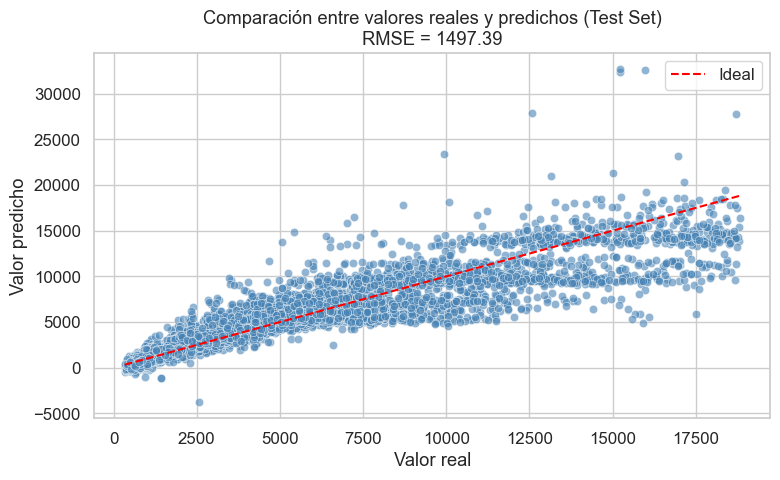

In [46]:
# Variables independientes (X) y dependiente (Y)
X = data_diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
Y = data_diamonds[['price']]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Agregar constante
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Ajustar modelo
model = sm.OLS(y_train, X_train_const).fit()
resid = model.resid

# Resumen estadístico
print(model.summary())

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test_const)

# Calcular RMSE
y_true = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

rmse = np.sqrt(np.mean((y_true - y_pred)**2))

# Gráfico de comparación
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_true, y=y_pred, color='steelblue', alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
         color='red', linestyle='--', label='Ideal')
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title(f'Comparación entre valores reales y predichos (Test Set)\nRMSE = {rmse:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ***Análisis***

El modelo de regresión lineal para predecir el precio de los diamantes presenta un R² de 0.859, indicando que aproximadamente el 85.9% de la variabilidad del precio puede explicarse por las variables incluidas, lo que refleja la capacidad explicativa del modelo. Es importante destacar que esta medida tiende a aumentar al añadir nuevas variables explicatorias, incluso si estas no aportan información relevante. Por esta razón se obtiene también el R² ajustado, que en este caso es 0.859, el cual proporciona una estimación más realista del poder explicativo del modelo al corregir el efecto de incluir múltiples predictores en función del tamaño de la muestra. Por su parte, el RMSE del modelo es de 1,497.38, lo que significa que, en promedio, las predicciones difieren alrededor de 1,500 unidades monetarias respecto a los valores reales.

En la gráfica de valores reales versus valores predichos se observa que los precios bajos se aproximan a la línea ideal de predicción, mientras que los precios altos muestran una dispersión creciente, indicando que las predicciones son menos precisas para valores elevados.

En cuanto a la significancia de los predictores, las variables incluidas en el modelo presentan p-values prácticamente iguales a cero, lo que indica que sus efectos son estadísticamente significativos y contribuyen a la explicación de la variabilidad del precio. Por otro lado las variables y y z, cuyas p-values son mayores a 0.05 sugiere que no aportan información estadísticamente relevante en este modelo.

### ***Análisis de supuestos***

Para evaluar la validez del modelo de regresión lineal, se analizaron los principales supuestos: linealidad, independencia, homocedasticidad, normalidad de los residuos y multicolinealidad.

El supuesto de linealidad se evaluó mediante la gráfica de residuos versus valores ajustados. En un modelo lineal adecuado, los residuos deben distribuirse de forma aleatoria alrededor de cero, sin mostrar patrones ni tendencias sistemáticas.

La independencia de los residuos se examinó con la prueba de Durbin-Watson, que detecta autocorrelación. Valores cercanos a 2 indican independencia, mientras que valores menores a 1 o mayores a 3 sugieren presencia de autocorrelación en los residuos.

La homocedasticidad se evaluó mediante el gráfico de residuos frente a los valores ajustados, donde un patrón en forma de cono o embudo sugiere la presencia de heterocedasticidad. Adicionalmente, se aplicó la prueba de Breusch–Pagan para verificar la homocedasticidad del modelo.

La normalidad de los residuos se evaluó mediante el histograma de residuos, que debería aproximarse a una curva en forma de campana; el gráfico Q–Q (Quantile–Quantile), en el cual los puntos cercanos a la línea diagonal indican normalidad; y la prueba de Kolmogorov-Smirnov, que proporciona una evaluación estadística formal de la adecuación de los residuos a una distribución normal.

Finalmente, la multicolinealidad entre las variables predictoras se examinó mediante la matriz de correlación. Valores de correlación muy altos entre predictores pueden indicar multicolinealidad


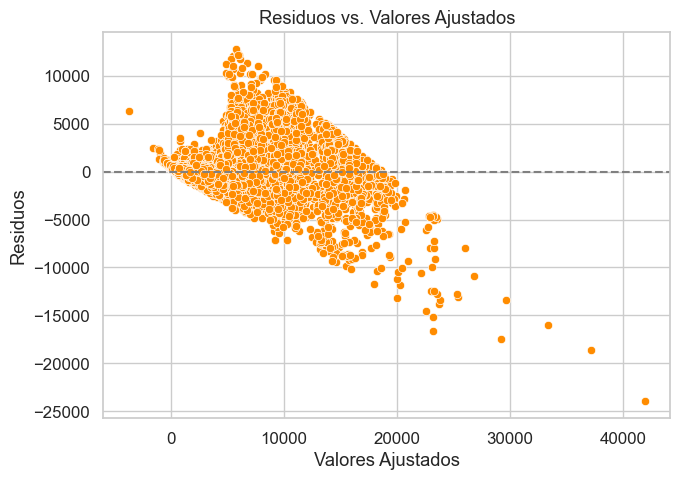

Prueba de Breusch–Pagan (Modelo Homocedástico):
p-valor: 0.0000 → Posible heterocedasticidad


In [35]:
# --- Visualización de Linealidad y Heterocedasticidad ---
fitted_values = model.fittedvalues

plt.figure(figsize=(7, 5))
sns.scatterplot(x=fitted_values, y=resid, color='darkorange')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residuos vs. Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Prueba de Breusch–Pagan ---
# H0: Homocedasticidad (varianza constante).
# H1: Heterocedasticidad (la varianza depende de los predictores).
bp = het_breuschpagan(resid, model.model.exog)

print("Prueba de Breusch–Pagan (Modelo Homocedástico):")
print(f"p-valor: {bp[1]:.4f} → {'No hay evidencia de heterocedasticidad' if bp[1] > 0.05 else 'Posible heterocedasticidad'}")



### ***Análisis***

En la gráfica de residuos frente a los valores ajustados se observa que los residuos no se distribuyen aleatoriamente, mostrando un patrón descendente: son positivos para valores ajustados bajos y negativos para valores ajustados altos. Además, presentan una concentración similar a un embudo, lo que sugiere la presencia de heterocedasticidad. Esta observación se confirma con la prueba de Breusch–Pagan, cuyo valor p cercano a cero indica evidencia de heterocedasticidad en el modelo.

In [47]:
# ----Independencia de los residuos
# Prueba de Durbin-Watson
dw = durbin_watson(resid)
print(f"Durbin-Watson: {dw:.3f} → Cercano a 2")

Durbin-Watson: 1.989 → Cercano a 2


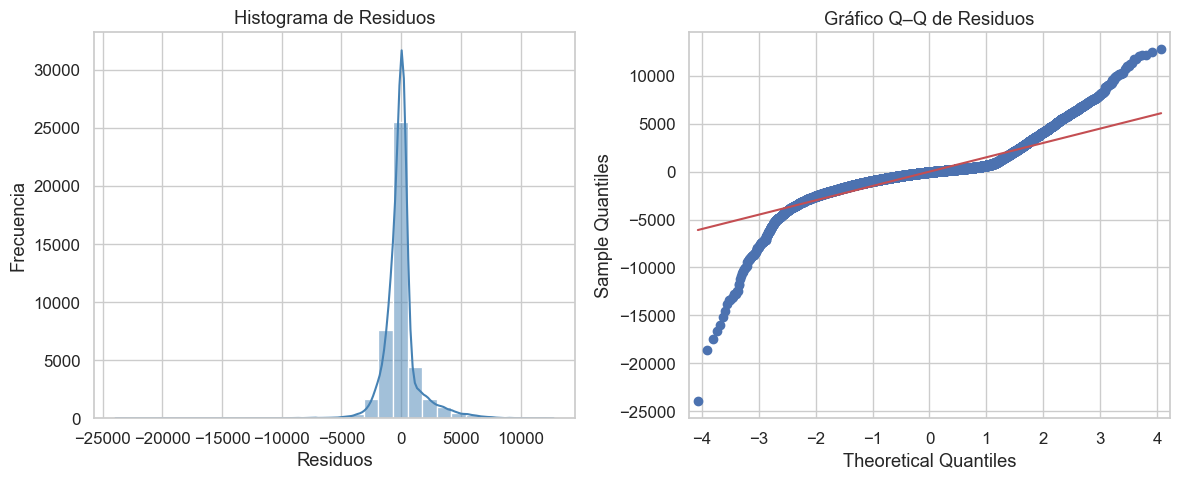

Prueba de Kolmogorov–Smirnov para Normalidad
Estadístico: 0.1805
p-valor: 0.0000 → No se cumple la normalidad


In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# -------------------- Histograma de residuos --------------------
# Graficar histograma con curva de estimación de densidad (KDE)
# Histograma con barras visibles + curva KDE
sns.histplot(
    resid, 
    kde=True,          # mantener la curva de densidad
    bins=30,           # número de intervalos (bins)
    color='steelblue', 
    stat='count',      
    element='bars',   
    ax=axes[0]
)
axes[0].set_title("Histograma de Residuos")   # Título del gráfico
axes[0].set_xlabel("Residuos")                # Etiqueta eje X
axes[0].set_ylabel("Frecuencia")              # Etiqueta eje Y

# -------------------- Gráfico Q–Q --------------------
# El gráfico Q–Q compara la distribución de los residuos con una distribución normal
qqplot(resid, line='s', ax=axes[1])
axes[1].set_title("Gráfico Q–Q de Residuos")  # Título del gráfico Q–Q

# Ajustar el espacio entre las dos gráficas
plt.tight_layout()
plt.show()

# # -------------- Prueba de Kolmogorov–Smirnov ---
# Se compara la distribución de los residuos contra una distribución normal estándar
stat_ks, p_value_ks = kstest(resid, 'norm', args=(resid.mean(), resid.std()))

print("Prueba de Kolmogorov–Smirnov para Normalidad")
print(f"Estadístico: {stat_ks:.4f}")
print(f"p-valor: {p_value_ks:.4f} → {'Se cumple la normalidad' if p_value_ks > 0.05 else 'No se cumple la normalidad'}")


### ***Análisis***

La independencia de los residuos se evaluó mediante la prueba de Durbin–Watson, obteniéndose un valor de 1.989, cercano a 2, lo que indica que los residuos son independientes. Respecto a la normalidad, el histograma de residuos muestra una forma aproximadamente similar a una campana; sin embargo, el Q–Q plot evidencia que los puntos se alejan de la diagonal en ambos extremos. Esta desviación se confirma mediante la prueba de Kolmogorov–Smirnov, cuyo valor p cercano a cero indica que los residuos no siguen una distribución normal.

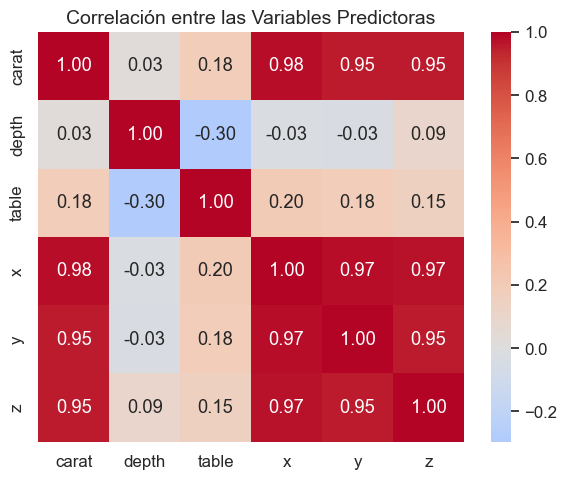

In [38]:
# Mapa de calor de correlaciones entre variables predictoras
correlations = X.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlación entre las Variables Predictoras', fontsize=14)
plt.tight_layout()
plt.show()

### ***Análisis***

Al evaluar la correlación entre las variables, se observa una alta correlación entre 
x,y y z, así como entre la variable carat y 𝑥,𝑦 y z, con valores superiores a 0.9. Esto es esperado, ya que el peso del diamante (carat) está directamente relacionado con sus dimensiones físicas. Esta alta correlación sugiere la presencia de multicolinealidad en el modelo.